In [1]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import os
import torch
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from SNN import FeedForward, SiameseDataSet, SiameseModel, seed_everything
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
from sklearn.datasets import make_moons

np.random.seed(42)

X, y = make_moons(n_samples=4000, noise=.10, random_state=42)
OneHot = OneHotEncoder(sparse=False)
y = OneHot.fit_transform(y.reshape((y.shape[0], 1)))

In [3]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [4]:
y.shape

(4000, 2)

In [5]:
np.sum(y, axis=0)

array([2000., 2000.])

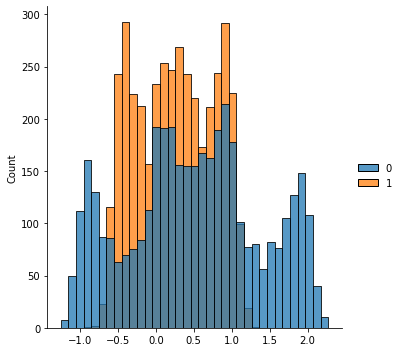

In [6]:
sns.displot(X)

In [7]:
# Test Effect of making X non-negative
# X = X + 2

# Define and Train Model

In [8]:
seed_everything(69)

In [9]:
MyFeedForward = FeedForward(2, [6, 3])

In [10]:
MyFeedForward

FeedForward(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): Linear(in_features=6, out_features=3, bias=True)
  )
)

In [11]:
MySNN = SiameseModel(MyFeedForward, predict_unknown = False, class_min_train=5, 
                     n_example_predict=10, learning_rate=1.0e-2, num_epochs = 50, batch_size = 1000, rand_seed=142)

In [12]:
# list(MySNN.logistic.parameters()) + list(MySNN.model.parameters())

In [13]:
MyTrainer = Trainer(model = MySNN, scale_X = False, use_pca = False, n_components = 2)

In [14]:
MyTrainTester = TrainTester(MyTrainer, metrics.accuracy_score)

In [15]:
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, n_splits=n_splits)

In [16]:
MyMultiTrainTester.train(X, y)

Running for split 1 of 5
Training Encoder
#########################################
Epoch 1 of 50
__Training__
2021-03-11 01:50:03
MEAN LOSS: 0.7552047637939453
__Validation__
2021-03-11 01:50:03
MEAN LOSS: 0.7039322393848272
#########################################
Epoch 2 of 50
__Training__
2021-03-11 01:50:03
MEAN LOSS: 0.6419615081787109
__Validation__
2021-03-11 01:50:04
MEAN LOSS: 0.5702216236790916
#########################################
Epoch 3 of 50
__Training__
2021-03-11 01:50:04
MEAN LOSS: 0.5288792404174805
__Validation__
2021-03-11 01:50:04
MEAN LOSS: 0.4891387946320267
#########################################
Epoch 4 of 50
__Training__
2021-03-11 01:50:04
MEAN LOSS: 0.4466758346557617
__Validation__
2021-03-11 01:50:04
MEAN LOSS: 0.408752571881944
#########################################
Epoch 5 of 50
__Training__
2021-03-11 01:50:04
MEAN LOSS: 0.3549153350830078
__Validation__
2021-03-11 01:50:05
MEAN LOSS: 0.3264612666558404
#######################################

MEAN LOSS: 0.014829158449172973
__Validation__
2021-03-11 01:50:22
MEAN LOSS: 0.03266142854596128
#########################################
Epoch 46 of 50
__Training__
2021-03-11 01:50:22
MEAN LOSS: 0.0144626314163208
__Validation__
2021-03-11 01:50:23
MEAN LOSS: 0.032512875208438353
#########################################
Epoch 47 of 50
__Training__
2021-03-11 01:50:23
MEAN LOSS: 0.014093525457382202
__Validation__
2021-03-11 01:50:23
MEAN LOSS: 0.03219549855490615
#########################################
Epoch 48 of 50
__Training__
2021-03-11 01:50:23
MEAN LOSS: 0.013860840797424317
__Validation__
2021-03-11 01:50:24
MEAN LOSS: 0.032727112971802856
#########################################
Epoch 49 of 50
__Training__
2021-03-11 01:50:24
MEAN LOSS: 0.013615061521530152
__Validation__
2021-03-11 01:50:24
MEAN LOSS: 0.03184256072949977
#########################################
Epoch 50 of 50
__Training__
2021-03-11 01:50:24
MEAN LOSS: 0.013551624965667725
__Validation__
2021-03-11 01

MEAN LOSS: 0.015344780158996582
__Validation__
2021-03-11 01:50:44
MEAN LOSS: 0.012077237119769105
#########################################
Epoch 40 of 50
__Training__
2021-03-11 01:50:44
MEAN LOSS: 0.01493822250366211
__Validation__
2021-03-11 01:50:45
MEAN LOSS: 0.011623625332551643
#########################################
Epoch 41 of 50
__Training__
2021-03-11 01:50:45
MEAN LOSS: 0.014606857538223267
__Validation__
2021-03-11 01:50:45
MEAN LOSS: 0.012384009833383088
#########################################
Epoch 42 of 50
__Training__
2021-03-11 01:50:45
MEAN LOSS: 0.014422122716903686
__Validation__
2021-03-11 01:50:46
MEAN LOSS: 0.01122890840662588
#########################################
Epoch 43 of 50
__Training__
2021-03-11 01:50:46
MEAN LOSS: 0.014171383476257324
__Validation__
2021-03-11 01:50:46
MEAN LOSS: 0.011971690008814114
#########################################
Epoch 44 of 50
__Training__
2021-03-11 01:50:46
MEAN LOSS: 0.013997191333770751
__Validation__
2021-03-11

MEAN LOSS: 0.016181359720230104
__Validation__
2021-03-11 01:51:06
MEAN LOSS: 0.01688712797757208
#########################################
Epoch 34 of 50
__Training__
2021-03-11 01:51:06
MEAN LOSS: 0.015456048059463502
__Validation__
2021-03-11 01:51:07
MEAN LOSS: 0.016442443528334155
#########################################
Epoch 35 of 50
__Training__
2021-03-11 01:51:07
MEAN LOSS: 0.015050820779800415
__Validation__
2021-03-11 01:51:07
MEAN LOSS: 0.016572086259548348
#########################################
Epoch 36 of 50
__Training__
2021-03-11 01:51:07
MEAN LOSS: 0.014590874767303467
__Validation__
2021-03-11 01:51:07
MEAN LOSS: 0.015104947274703361
#########################################
Epoch 37 of 50
__Training__
2021-03-11 01:51:08
MEAN LOSS: 0.013959417867660523
__Validation__
2021-03-11 01:51:08
MEAN LOSS: 0.015624429919932148
#########################################
Epoch 38 of 50
__Training__
2021-03-11 01:51:08
MEAN LOSS: 0.013498575830459594
__Validation__
2021-03-1

MEAN LOSS: 0.01956950101852417
__Validation__
2021-03-11 01:51:28
MEAN LOSS: 0.019343862439146136
#########################################
Epoch 28 of 50
__Training__
2021-03-11 01:51:28
MEAN LOSS: 0.018794798803329467
__Validation__
2021-03-11 01:51:28
MEAN LOSS: 0.018696118001997955
#########################################
Epoch 29 of 50
__Training__
2021-03-11 01:51:28
MEAN LOSS: 0.018144204807281496
__Validation__
2021-03-11 01:51:29
MEAN LOSS: 0.018842975477395458
#########################################
Epoch 30 of 50
__Training__
2021-03-11 01:51:29
MEAN LOSS: 0.017358049392700196
__Validation__
2021-03-11 01:51:29
MEAN LOSS: 0.018284545300996165
#########################################
Epoch 31 of 50
__Training__
2021-03-11 01:51:29
MEAN LOSS: 0.016668459177017213
__Validation__
2021-03-11 01:51:30
MEAN LOSS: 0.01705500051634039
#########################################
Epoch 32 of 50
__Training__
2021-03-11 01:51:30
MEAN LOSS: 0.015942123222351074
__Validation__
2021-03-11

MEAN LOSS: 0.37528444366455077
__Validation__
2021-03-11 01:51:50
MEAN LOSS: 0.3416181095648627
#########################################
Epoch 22 of 50
__Training__
2021-03-11 01:51:51
MEAN LOSS: 0.375277799987793
__Validation__
2021-03-11 01:51:51
MEAN LOSS: 0.34278546529884923
#########################################
Epoch 23 of 50
__Training__
2021-03-11 01:51:51
MEAN LOSS: 0.37526015625
__Validation__
2021-03-11 01:51:51
MEAN LOSS: 0.34068097819303417
#########################################
Epoch 24 of 50
__Training__
2021-03-11 01:51:51
MEAN LOSS: 0.3754487640380859
__Validation__
2021-03-11 01:51:52
MEAN LOSS: 0.3436966285739902
#########################################
Epoch 25 of 50
__Training__
2021-03-11 01:51:52
MEAN LOSS: 0.3749338455200195
__Validation__
2021-03-11 01:51:52
MEAN LOSS: 0.341564240271073
#########################################
Epoch 26 of 50
__Training__
2021-03-11 01:51:52
MEAN LOSS: 0.37461068878173825
__Validation__
2021-03-11 01:51:53
MEAN LOSS: 0.

In [17]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,1.000000,train
1,0.999375,train
2,1.000000,train
3,0.999687,train
4,0.906250,train
0,0.998750,test
1,0.998750,test
2,1.000000,test
3,0.998750,test
4,0.891250,test


<AxesSubplot:xlabel='stage', ylabel='score'>

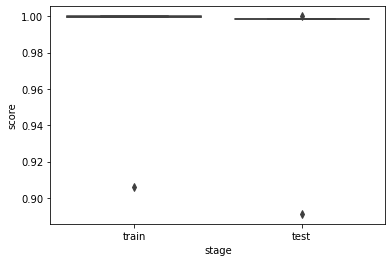

In [18]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

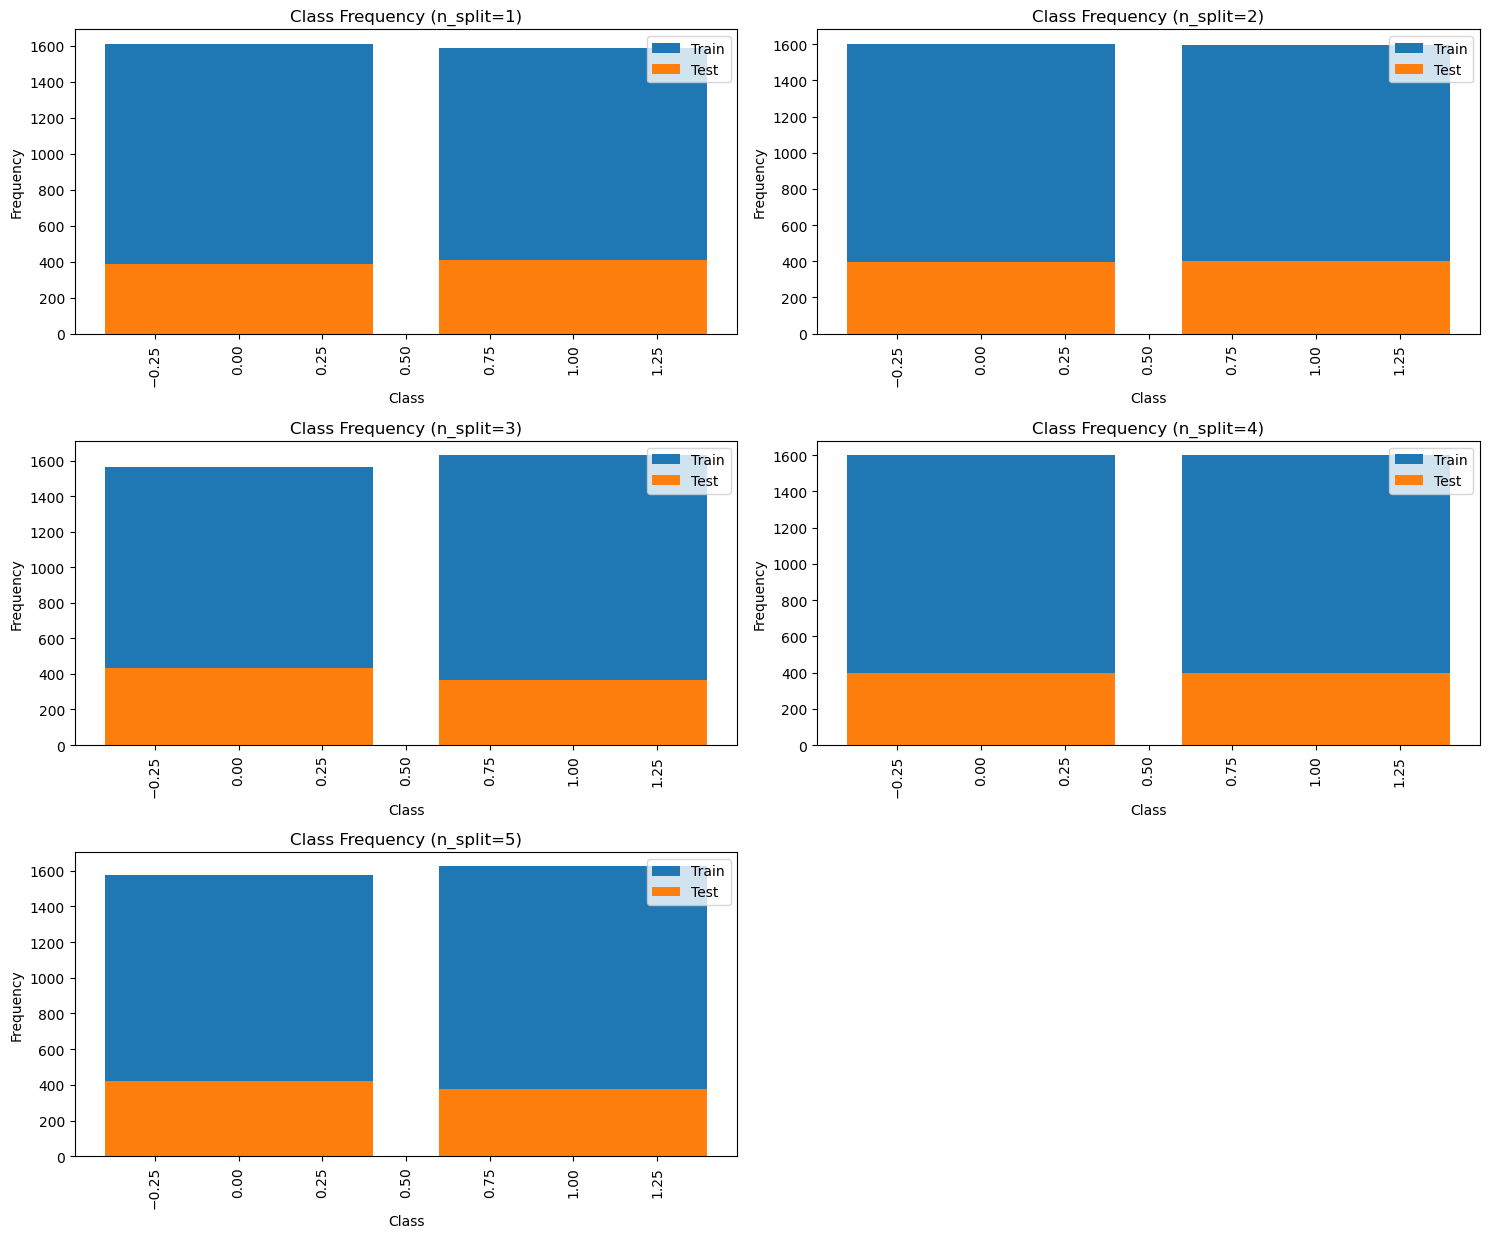

In [19]:
MyMultiTrainTester.plot_class_freq(normalize=True)

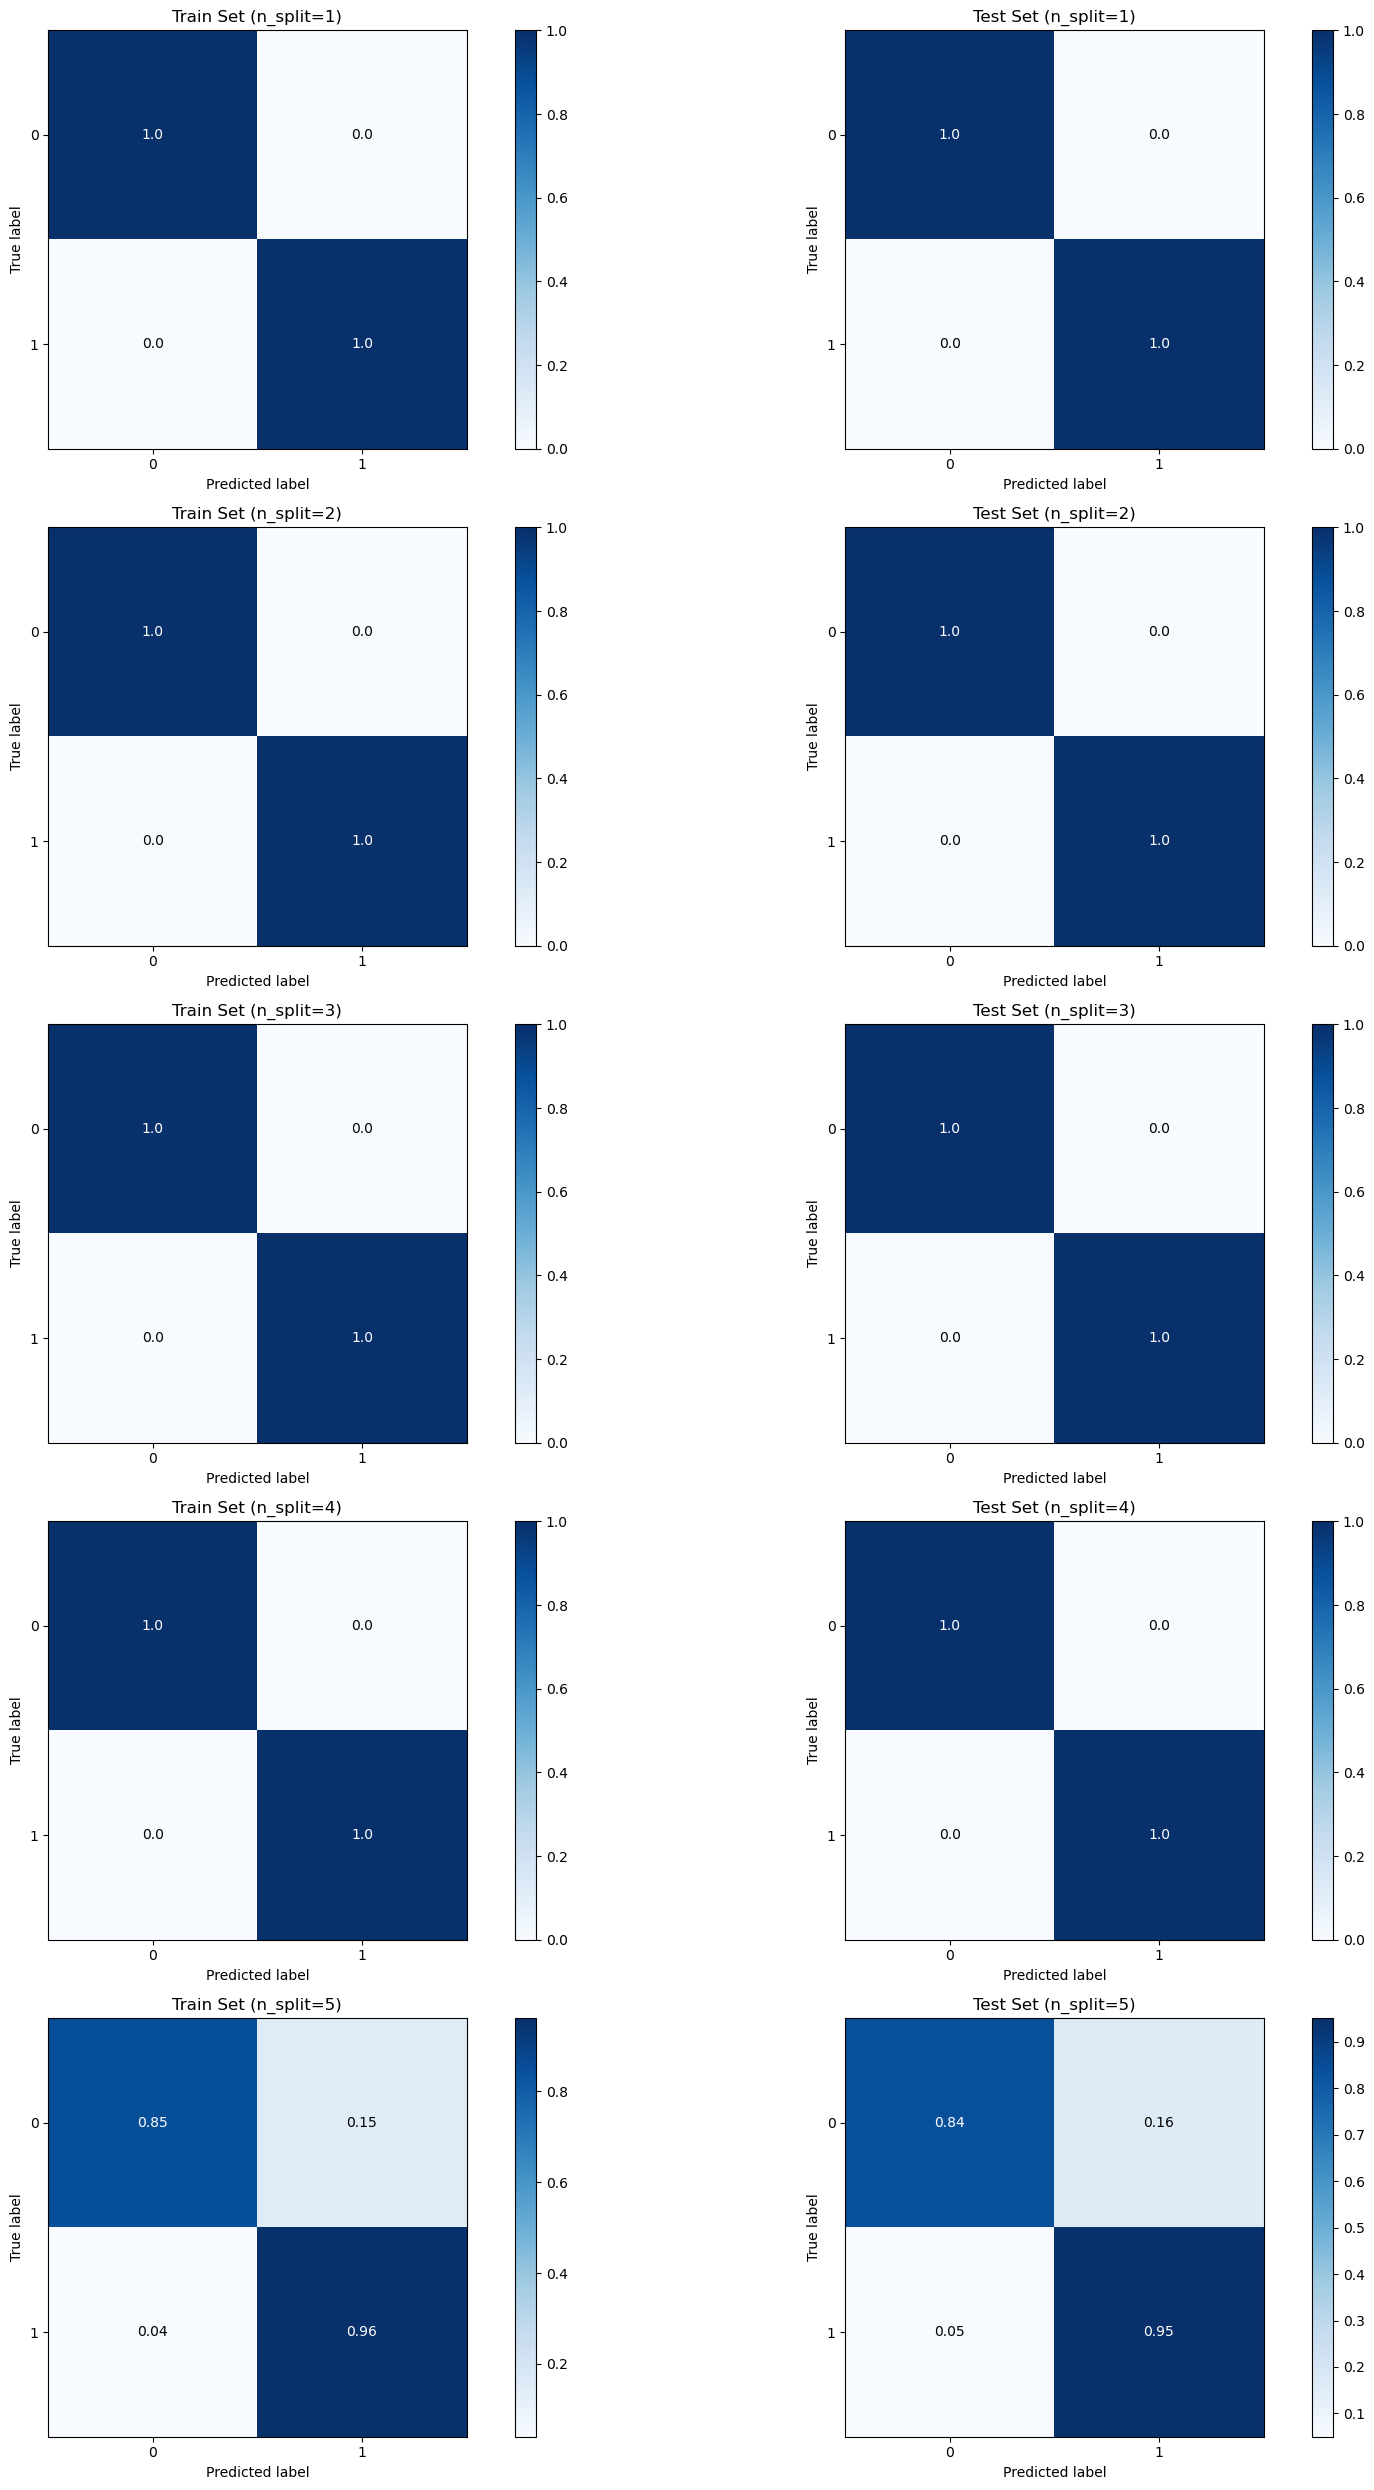

In [20]:
MyMultiTrainTester.plot_confusion(normalize=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


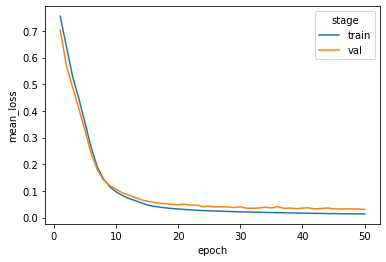

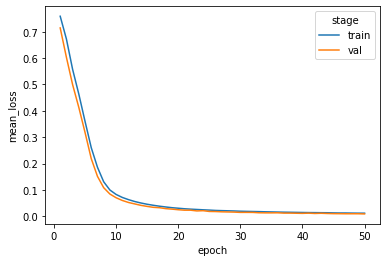

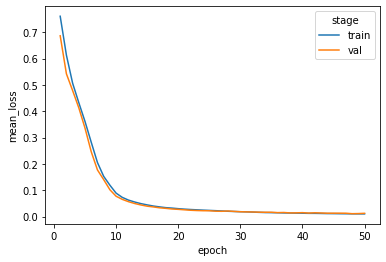

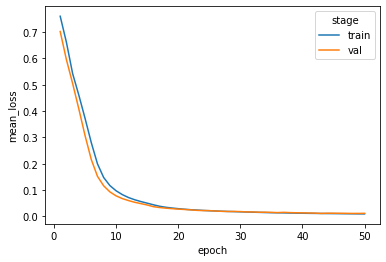

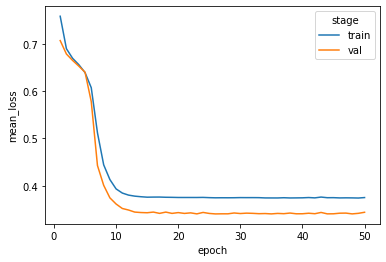

In [21]:
for i, trainer in enumerate(MyMultiTrainTester.TrainerList):
    plt.figure(i)
    print(sns.lineplot(data=trainer.model.TrainStats, x='epoch', y='mean_loss', hue = 'stage'))

### Examine Data In Encoded Space

In [22]:
Trainer_use = MyMultiTrainTester.TrainerList[0]

In [23]:
X_transform = Trainer_use.transform_X(X)

In [24]:
X_encoded = Trainer_use.model.model.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [25]:
# X_encoded = MyFeedForward.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [26]:
X_encoded.shape

(4000, 3)

In [27]:
y_label = Trainer_use.model.one_hot.inverse_transform(y).astype('str')

In [28]:
y_pred = Trainer_use.model.predict(X_transform)
y_pred = Trainer_use.model.one_hot.inverse_transform(y_pred).astype('str')

In [29]:
X_enc_df = pd.DataFrame(X_encoded, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
X_enc_df['y'] = y_label
X_enc_df['y_pred'] = y_pred

In [30]:
X_enc_df

,X1,X2,X3,y,y_pred
0,2.121362,0.322685,0.0,0,0
1,0.000000,2.050359,0.0,1,1
2,2.354718,0.429933,0.0,0,0
3,0.000000,1.416806,0.0,1,1
4,0.000000,1.404281,0.0,1,1
...,...,...,...,...,...
3995,2.736630,1.576479,0.0,0,0
3996,2.775656,3.111527,0.0,0,0
3997,2.579317,0.606333,0.0,0,0
3998,0.000000,2.040499,0.0,1,1


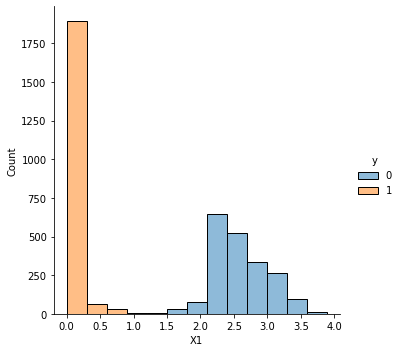

In [31]:
sns.displot(data=X_enc_df, x='X1', hue='y')

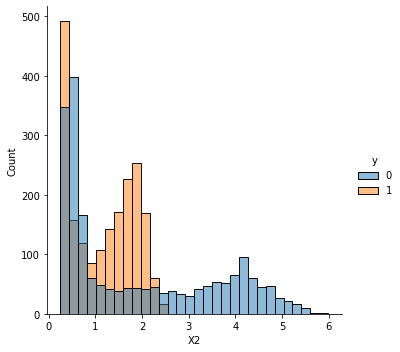

In [32]:
sns.displot(data=X_enc_df, x='X2', hue='y')

In [33]:
def do_plot(df, x, y, hue):
    if x in df.columns and y in df.columns and hue in df.columns:
        sns.scatterplot(data=df, x=x, y=y, hue = hue)

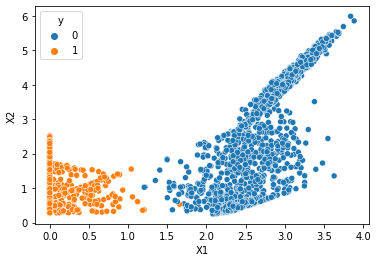

In [34]:
do_plot(X_enc_df, 'X1', 'X2', 'y')

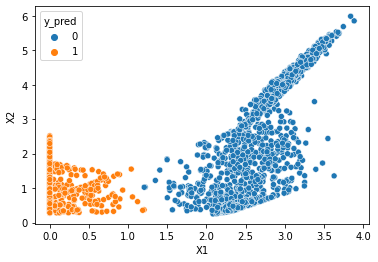

In [35]:
do_plot(X_enc_df, 'X1', 'X2', 'y_pred')

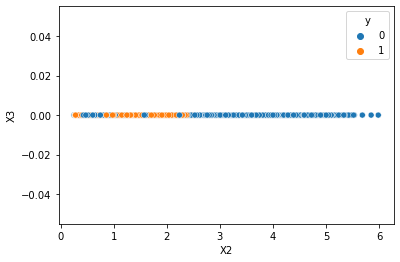

In [36]:
do_plot(X_enc_df, 'X2', 'X3', 'y')

In [37]:
do_plot(X_enc_df, 'X3', 'X4', 'y')

### Visualize Distances Between Database Points and Query Points

Overall, it seems that logistic classifer chokes if there are uninformative features.

In [38]:
X_db = Trainer_use.model.ClassDB['X_encoded'].detach().numpy()

In [39]:
X_db.shape

(20, 3)

In [40]:
y_db = Trainer_use.model.ClassDB['y'].detach().numpy()
y_db = Trainer_use.model.one_hot.inverse_transform(y_db).astype('str').flatten()

In [41]:
db_df = pd.DataFrame(X_db, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
db_df['y'] = y_db

In [42]:
db_df['y'].value_counts()

1    10
0    10
Name: y, dtype: int64

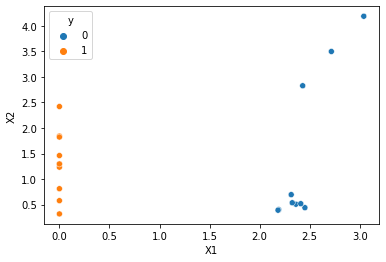

In [43]:
do_plot(db_df, 'X1', 'X2', 'y')

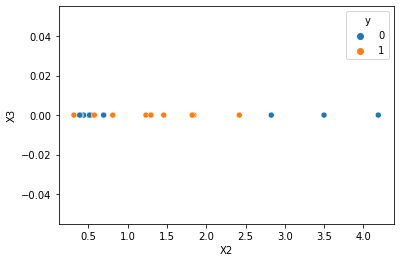

In [44]:
do_plot(db_df, 'X2', 'X3', 'y')

In [45]:
X_enc_df['misclassified'] = X_enc_df['y'] != X_enc_df['y_pred']

In [46]:
X_enc_df

,X1,X2,X3,y,y_pred,misclassified
0,2.121362,0.322685,0.0,0,0,False
1,0.000000,2.050359,0.0,1,1,False
2,2.354718,0.429933,0.0,0,0,False
3,0.000000,1.416806,0.0,1,1,False
4,0.000000,1.404281,0.0,1,1,False
...,...,...,...,...,...,...
3995,2.736630,1.576479,0.0,0,0,False
3996,2.775656,3.111527,0.0,0,0,False
3997,2.579317,0.606333,0.0,0,0,False
3998,0.000000,2.040499,0.0,1,1,False


In [47]:
misclassified_idx = np.argwhere(X_enc_df['misclassified'].to_numpy()).flatten()
misclassified_idx

array([1355])

In [48]:
X_enc_df.iloc[misclassified_idx, :]

,X1,X2,X3,y,y_pred,misclassified
1355,1.657284,0.532283,0.0,1,0,True


In [49]:
X_diff = torch.abs(torch.from_numpy(X_encoded[misclassified_idx[0], :] - X_db).to(torch.float32))
logistic_output = Trainer_use.model.logistic.forward(X_diff)

In [50]:
y_db == '0'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [51]:
logistic_output[y_db == '0', 1]

tensor([0.8249, 0.9897, 0.7553, 0.9549, 0.8497, 0.9376, 0.7774, 0.8841, 0.9802,
        0.9408], grad_fn=<IndexBackward>)

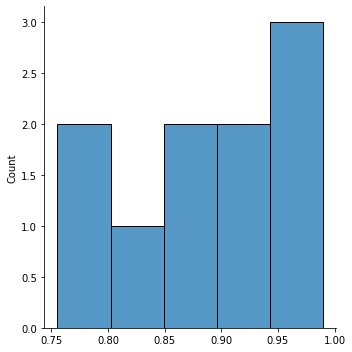

In [52]:
# distribution of 0 label probabilities
sns.displot(logistic_output[y_db == '0', 1].detach().numpy())

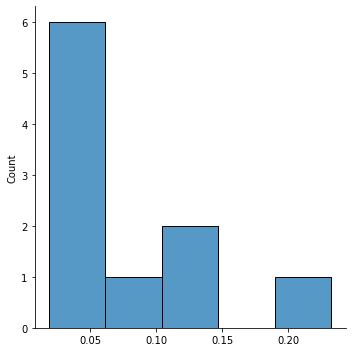

In [53]:
# distribution of 1 label
sns.displot(logistic_output[y_db == '1',1].detach().numpy())

In [54]:
torch.median(logistic_output[y_db == '0',1])

tensor(0.8841, grad_fn=<MedianBackward0>)

In [55]:
torch.median(logistic_output[y_db == '1',1])

tensor(0.0532, grad_fn=<MedianBackward0>)

In [56]:
X_diff_df = pd.DataFrame(X_diff, columns = ['X' + str(i+1) + '_diff' for i in range(X_encoded.shape[1])])
X_diff_df['y'] = y_db

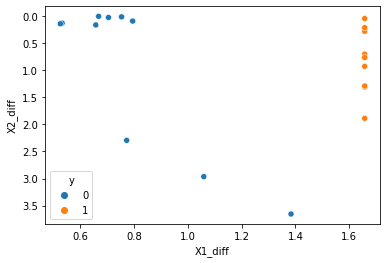

In [57]:
do_plot(X_diff_df, 'X1_diff', 'X2_diff', 'y')

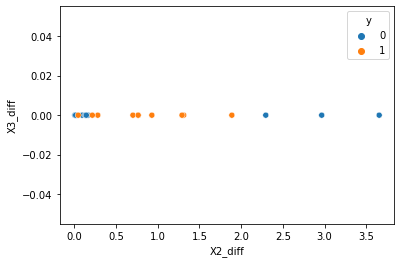

In [58]:
do_plot(X_diff_df, 'X2_diff', 'X3_diff', 'y')

In [59]:
for p in Trainer_use.model.logistic.parameters():
    print(p)

Parameter containing:
tensor([[ 3.0460e+00, -5.6116e-01,  1.5760e-20],
        [-2.7736e+00,  9.3954e-01, -5.1407e-21]], requires_grad=True)
Parameter containing:
tensor([-2.9235,  2.6955], requires_grad=True)


In [60]:
3.6720

3.672

### Examine Data In Original Space

In [61]:
X_df = pd.DataFrame(X, columns = ['X1', 'X2'])
X_df['y'] = y_label

<AxesSubplot:xlabel='X1', ylabel='X2'>

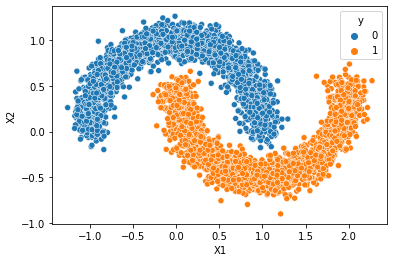

In [62]:
sns.scatterplot(data=X_df, x='X1', y='X2', hue = 'y')